## **Domain**

This project operates within the domain of Sign Language Recognition for Emergency Response Systems, an intersection of computer vision, gesture recognition, and assistive technology. The system leverages real-time hand gesture detection and classification to enable effective communication in high-stakes situations.

# PROJECT : SIGN LANGUAGE RECOGNITION

## **Problem Statement**

The primary objective of this dataset is to enable the development of a sign language recognition system that assists the deaf and hard-of-hearing community in emergency scenarios. The system should:
- Recognize specific hand gestures captured via a smartphone camera.
- Map these gestures to predefined emergency classes such as "Danger," "Help," and "Police."
- Facilitate non-verbal communication by triggering automated alerts to relevant authorities or services.

## **Real-Life Use Case**

### Mobile Emergency Application
An application that integrates real-time sign language recognition, allowing individuals to communicate during emergencies. The app will:
- Recognize specific gestures related to emergency situations.
- Trigger notifications to relevant emergency services.

**Example Scenario**
A deaf person trapped in a building during a fire performs the "Fire" gesture in front of their smartphone camera. The app detects the gesture and sends an alert to the fire department, including the person’s location.

---

## **Dataset Description**

The dataset is designed to support the development of a mobile emergency application for sign language recognition. It contains images and videos representing 8 distinct emergency-related gestures, ensuring inclusivity and practicality for individuals who are deaf or hard of hearing. The dataset emphasizes diverse environmental conditions to enhance model robustness.

## **Classes**

The dataset includes the following classes:

- **Danger** : Indicates a potential threat or hazard.
- **Help**: Requests immediate assistance.
- **Stop**: Signals a halt or warning.
- **Please**: Indicates the urge to ask someone to help them do something.
- **Fire**: Communicates the presence of a fire.
- **Water**: Represents the need for water in emergency situations.
- **Police**: Indicates the need for law enforcement.
- **Emergency**: Represents a general state of urgency.

## **Data Collection**
- Collect video frames of 8 emergency gestures performed by diverse individuals.
- Ensure varied hand orientations, lighting conditions, and backgrounds to improve robustness.
- Include diverse demographics to account for variations in hand size and shape.

---

## **Dataset Preparation Steps**

- *Data Unzipping*
    - Extract raw data from compressed files.
- *Frame Extraction*
    - Convert video data into individual frames for analysis.
- *Upsampling*
    - Balance the dataset by increasing the number of underrepresented class samples.
- *Preprocessing Frames* with Hand Detection and Cropping (ROI Extraction)
    - Extract Region of Interest (**ROI**) focusing on hand regions.
    - **Resize** images to a consistent dimension (e.g., 224x224 pixels).
    - **Normalize** pixel values to enhance model performance.
    - Convert images to **grayscale** for simplicity.
    - Apply **Canny edge detection** for emphasizing hand contours.

- *Balanced Augmentation*
    - Apply rotation, flipping, scaling, and synthetic noise to simulate diverse conditions and improve robustness.


---

## PART 1 : PRE-PROCESSING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Unzipping the Dataset**

In [ ]:
import zipfile #  Provides tools for working with `.zip` files.
import os # Used for interacting with the file system

# Specify the path to the zip file containing the dataset on Google Drive
zip_path = '/content/drive/MyDrive/Sign Language Recognition/Dataset.zip'

# Specify the directory where the extracted files will be saved
extract_path = '/content/drive/MyDrive/Sign Language Recognition/'

# Open the zip file in read mode using the zipfile module
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_path)

# Print a confirmation message after successful extraction
print("Dataset unzipped!")

Dataset unzipped!


### **Extracting Frames from Videos**

This script extracts frames from videos stored in a structured folder, organized by classes, at a frame rate of 30 FPS. The extracted frames are saved in a corresponding structured output folder.

In [ ]:
import cv2
import glob

def extract_frames_from_videos(input_folder, output_folder, fps=30):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all class folders in the input folder
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)  # Path to the class folder
        output_class_folder = os.path.join(output_folder, class_folder)  # Corresponding output folder
        os.makedirs(output_class_folder, exist_ok=True)  # Create output folder for the class

        # Process all video files in the current class folder
        for video_file in glob.glob(f"{class_path}/*.mp4"):
            cap = cv2.VideoCapture(video_file)  # Open the video file
            video_name = os.path.splitext(os.path.basename(video_file))[0]  # Get video name without extension
            frame_rate = int(cap.get(cv2.CAP_PROP_FPS))  # Get the video frame rate
            frame_interval = max(1, frame_rate // fps)  # Calculate interval for extracting frames
            frame_count = 0  # Count of frames processed
            frame_index = 0  # Index for extracted frames

            # Read frames from the video
            while cap.isOpened():
                ret, frame = cap.read()  # Read the next frame
                if not ret:  # Break the loop if no more frames
                    break
                if frame_count % frame_interval == 0:  # Check if the frame should be saved
                    frame_name = f"{output_class_folder}/{video_name}_frame_{frame_index}.jpg"  # Frame file name
                    cv2.imwrite(frame_name, frame)  # Save the frame as an image
                    frame_index += 1  # Increment frame index
                frame_count += 1  # Increment frame count
            cap.release()  # Release the video capture object
    print("Frames extracted!")  # Confirmation message

# Paths for input videos and output frames
input_videos_path = '/content/drive/MyDrive/Sign Language Recognition/Dataset'
output_frames_path = '/content/drive/MyDrive/Sign Language Recognition/Frame_extracted_data'

# Extract frames at 30 FPS
extract_frames_from_videos(input_videos_path, output_frames_path)

Frames extracted!


### **Counting Frames per Class**

This script calculates the number of extracted frames for each class in the specified folder. The results are returned as a dictionary, where the keys are class names and the values are the corresponding frame counts.

In [ ]:
def count_frames_per_class(folder_path):
    frame_counts = {}  # Dictionary to store the count of frames for each class

    # Iterate through each class folder in the specified folder path
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)  # Path to the current class folder

        # Count the number of .jpg files (frames) in the class folder
        frame_counts[class_folder] = len(glob.glob(f"{class_path}/*.jpg"))

    # Return the dictionary containing frame counts for each class
    return frame_counts

# Call the function to count frames in the extracted frames folder
frame_counts = count_frames_per_class(output_frames_path)

# Print the frame counts for each class
print("Frame counts per class:", frame_counts)

Frame counts per class: {'danger': 432, 'emergency': 273, 'fire': 180, 'help': 604, 'please': 523, 'police': 496, 'stop': 304, 'water': 676}


---

###  **Upsampling Classes with Augmentation**

This script balances the dataset by upsampling classes with fewer frames. It uses specified augmentations to generate new frames and ensures all classes have the same number of frames.

In [ ]:
import random

def augment_frame(frame):
    # Apply one of the specified augmentations to the frame
    augmentations = [
        lambda x: cv2.flip(x, 1),  # Horizontal flip
        lambda x: cv2.rotate(x, cv2.ROTATE_90_CLOCKWISE),  # Rotate 90 degrees clockwise
        lambda x: cv2.rotate(x, cv2.ROTATE_90_COUNTERCLOCKWISE),  # Rotate 90 degrees counterclockwise
    ]
    # Randomly select and apply an augmentation
    augmentation = random.choice(augmentations)
    return augmentation(frame)

def upsample_classes_with_augmentation(folder_path, frame_counts):
    # Determine the maximum number of frames among all classes
    max_frames = max(frame_counts.values())

    # Iterate through each class and its frame count
    for class_folder, count in frame_counts.items():
        class_path = os.path.join(folder_path, class_folder)  # Path to the class folder
        if count < max_frames:
            # Get a list of all existing frames in the class folder
            current_files = glob.glob(f"{class_path}/*.jpg")
            for i in range(max_frames - count):  # Calculate how many frames need to be added
                # Choose a random frame from the existing files
                source_file = random.choice(current_files)
                frame = cv2.imread(source_file)  # Read the selected frame

                # Apply augmentation to create a new frame
                augmented_frame = augment_frame(frame)

                # Save the augmented frame with a new name
                target_file = f"{class_path}/aug_{i}.jpg"
                cv2.imwrite(target_file, augmented_frame)
    print("Upsampling with specified augmentations complete!")

# Perform upsampling using the function
upsample_classes_with_augmentation(output_frames_path, frame_counts)

# Recount the frames in each class after upsampling
updated_frame_counts = count_frames_per_class(output_frames_path)

# Print the updated frame counts
print("Updated frame counts per class:", updated_frame_counts)

Upsampling with specified augmentations complete!
Updated frame counts per class: {'danger': 676, 'emergency': 676, 'fire': 676, 'help': 676, 'please': 676, 'police': 676, 'stop': 676, 'water': 676}


---

### **Preprocessing Frames with Hand Detection and Cropping : ROI EXTRACTION**

This script processes extracted frames to:
- Reject low-quality frames based on pixel intensity.
- Detect hands using Mediapipe and crop the region of interest (ROI) around detected hands.
- Save cropped frames in a structured output folder.

Hand detection and preprocessing complete!
Frames per class after preprocessing: {'danger': 480, 'emergency': 418, 'fire': 473, 'help': 466, 'please': 492, 'police': 425, 'stop': 391, 'water': 388}


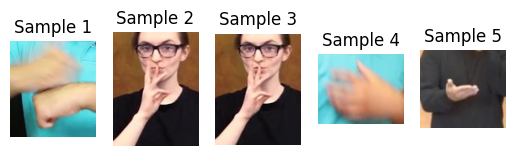

In [ ]:
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Function to preprocess frames: reject low-quality frames and crop around detected hands
def reject_low_quality_frames_and_crop_hands(input_folder, output_folder):
    # Initialize Mediapipe Hands for hand detection
    mp_hands = mp.solutions.hands
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:

        # Create the output folder if it doesn't exist
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        # Iterate over each class folder in the input folder
        for class_folder in os.listdir(input_folder):
            input_class_path = os.path.join(input_folder, class_folder)
            output_class_path = os.path.join(output_folder, class_folder)

            # Create output class folder if it doesn't exist
            if not os.path.exists(output_class_path):
                os.makedirs(output_class_path)

            # Process each frame in the class folder
            for frame_file in os.listdir(input_class_path):
                frame_path = os.path.join(input_class_path, frame_file)
                frame = cv2.imread(frame_path)

                # Reject empty or low-quality frames based on pixel intensity
                if frame is None or frame.sum() < 500:
                    continue

                # Convert frame to RGB format for Mediapipe processing
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = hands.process(rgb_frame)

                # Skip frames where no hands are detected
                if not results.multi_hand_landmarks:
                    continue

                # Get the image dimensions and initialize bounding box variables
                h, w, _ = frame.shape
                x_min, y_min, x_max, y_max = w, h, 0, 0

                # Calculate bounding box for detected hand(s)
                for hand_landmarks in results.multi_hand_landmarks:
                    for lm in hand_landmarks.landmark:
                        x, y = int(lm.x * w), int(lm.y * h)
                        x_min, y_min = min(x, x_min), min(y, y_min)
                        x_max, y_max = max(x, x_max), max(y, y_max)

                # Add context by expanding the bounding box
                padding = 40  # Pixels to expand around the hand region
                context_box = (
                    max(0, x_min - padding),  # Left
                    max(0, y_min - padding),  # Top
                    min(w, x_max + padding),  # Right
                    min(h, y_max + padding)   # Bottom
                )

                # Crop the frame using the calculated bounding box
                cropped_frame_with_context = frame[context_box[1]:context_box[3], context_box[0]:context_box[2]]
                output_frame_path = os.path.join(output_class_path, frame_file)

                # Save the cropped frame to the output folder
                cv2.imwrite(output_frame_path, cropped_frame_with_context)

    print("Hand detection and preprocessing complete!")

# Function to count the number of frames per class
def count_frames_per_class(folder_path):
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        frame_counts[class_folder] = len(os.listdir(class_path))  # Count files in each class folder
    return frame_counts

# Function to visualize a few processed images
def visualize_processed_images(output_folder, num_images=5):
    # Collect all images from the output folder
    all_images = []
    for class_folder in os.listdir(output_folder):
        class_path = os.path.join(output_folder, class_folder)
        all_images += glob.glob(f"{class_path}/*.jpg")

    # Randomly sample images for visualization
    sampled_images = random.sample(all_images, min(num_images, len(all_images)))
    for i, img_path in enumerate(sampled_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {i + 1}")
    plt.show()

# Paths for input and output
input_folder = "/content/drive/MyDrive/Sign Language Recognition/Frame_extracted_data"
output_folder = "/content/drive/MyDrive/Sign Language Recognition/ROI_extraction"

# Perform preprocessing
reject_low_quality_frames_and_crop_hands(input_folder, output_folder)

# Count the number of frames per class after preprocessing
processed_frame_counts = count_frames_per_class(output_folder)
print("Frames per class after preprocessing:", processed_frame_counts)

# Visualize some of the processed images
visualize_processed_images(output_folder)

---

### **Resizing the frames**

This script resizes all images in the output_folder to the 224x224 dimensions and saves them in the resized_folder.

Resizing complete! Resized images saved in: /content/drive/MyDrive/Sign Language Recognition/Resized_images
Frames per class after resizing: {'danger': 480, 'emergency': 418, 'fire': 473, 'help': 466, 'please': 492, 'police': 425, 'stop': 391, 'water': 388}


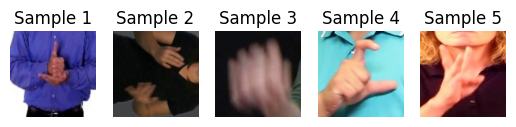

In [ ]:
def resize_and_visualize(output_folder, resized_folder, resize_dim=(224, 224)):
    # Create a new folder for resized images if it doesn't exist
    if not os.path.exists(resized_folder):
        os.makedirs(resized_folder)

    # Process each class folder in the original output folder
    for class_folder in os.listdir(output_folder):
        input_class_path = os.path.join(output_folder, class_folder)

        # Skip the Resized folder (if it already exists in the input folder)
        if class_folder == "Resized":
            continue

        # Create a corresponding class folder in the resized folder
        resized_class_path = os.path.join(resized_folder, class_folder)
        if not os.path.exists(resized_class_path):
            os.makedirs(resized_class_path)

        # Resize and save each image in the class folder
        for frame_file in os.listdir(input_class_path):
            frame_path = os.path.join(input_class_path, frame_file)
            frame = cv2.imread(frame_path)

            # Resize the frame to the specified dimensions
            resized_frame = cv2.resize(frame, resize_dim)

            # Save the resized frame in the resized folder
            output_frame_path = os.path.join(resized_class_path, frame_file)
            cv2.imwrite(output_frame_path, resized_frame)

    print(f"Resizing complete! Resized images saved in: {resized_folder}")

def count_resized_frames_per_class(folder_path):
    # Count the number of resized frames for each class
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        frame_counts[class_folder] = len(os.listdir(class_path))
    return frame_counts

def visualize_resized_images(resized_folder, num_images=5):
    # Collect all resized image paths
    all_images = []
    for class_folder in os.listdir(resized_folder):
        class_path = os.path.join(resized_folder, class_folder)
        all_images += glob.glob(f"{class_path}/*.jpg")

    # Randomly pick and display a specified number of resized images
    sampled_images = random.sample(all_images, min(num_images, len(all_images)))
    for i, img_path in enumerate(sampled_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Sample {i+1}")
    plt.show()

# Paths for input and resized folders
output_folder = "/content/drive/MyDrive/Sign Language Recognition/ROI_extraction"
resized_folder = "/content/drive/MyDrive/Sign Language Recognition/Resized_images"

# Perform resizing on frames from the output folder
resize_and_visualize(output_folder, resized_folder, resize_dim=(224, 224))

# Count the number of resized frames per class
resized_frame_counts = count_resized_frames_per_class(resized_folder)
print("Frames per class after resizing:", resized_frame_counts)

# Visualize a few resized images from the resized folder
visualize_resized_images(resized_folder, num_images=5)

---

### **Normalization of the frames**

This piece of code normalizes all images in the resized_folder to the range [0, 1] by dividing the pixel values by 255, and saves them in the normalized_folder

Normalization complete! Normalized images saved in: /content/drive/MyDrive/Sign Language Recognition/Normalized_images
Frames per class after normalization: {'danger': 480, 'emergency': 418, 'fire': 473, 'help': 466, 'please': 492, 'police': 425, 'stop': 391, 'water': 388}


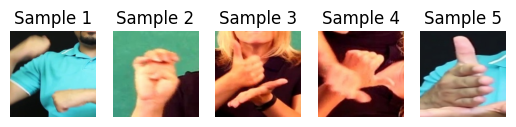

In [ ]:
def normalize_and_visualize(resized_folder, normalized_folder):
    # Create a new folder for normalized images if it doesn't exist
    if not os.path.exists(normalized_folder):
        os.makedirs(normalized_folder)

    # Process each class folder in resized folder
    for class_folder in os.listdir(resized_folder):
        input_class_path = os.path.join(resized_folder, class_folder)

        # Skip if it's not a directory (to handle any non-directory files)
        if not os.path.isdir(input_class_path):
            continue

        # Create the corresponding class folder in the normalized folder
        normalized_class_path = os.path.join(normalized_folder, class_folder)
        if not os.path.exists(normalized_class_path):
            os.makedirs(normalized_class_path)

        # Process each image in the class folder
        for frame_file in os.listdir(input_class_path):
            frame_path = os.path.join(input_class_path, frame_file)
            frame = cv2.imread(frame_path)  # Read the image

            # Normalize the frame by dividing by 255 to scale pixel values to [0, 1]
            normalized_frame = frame.astype('float32') / 255.0

            # Convert normalized frame back to uint8 for saving (scaling back to [0, 255])
            normalized_frame_uint8 = (normalized_frame * 255).astype('uint8')

            # Save the normalized frame to the output folder
            output_frame_path = os.path.join(normalized_class_path, frame_file)
            cv2.imwrite(output_frame_path, normalized_frame_uint8)

    print(f"Normalization complete! Normalized images saved in: {normalized_folder}")

def count_normalized_frames_per_class(folder_path):
    # Count the number of frames in each class folder
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        frame_counts[class_folder] = len(os.listdir(class_path))  # Count files in each class folder
    return frame_counts

def visualize_normalized_images(normalized_folder, num_images=5):
    # Collect all image paths in the normalized folder
    all_images = []
    for class_folder in os.listdir(normalized_folder):
        class_path = os.path.join(normalized_folder, class_folder)
        all_images += glob.glob(f"{class_path}/*.jpg")

    # Randomly pick and display 5 images from the entire folder
    sampled_images = random.sample(all_images, min(num_images, len(all_images)))
    for i, img_path in enumerate(sampled_images):
        img = cv2.imread(img_path)  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        plt.subplot(1, num_images, i+1)  # Set up the plot
        plt.imshow(img)  # Show the image
        plt.axis('off')  # Hide axes
        plt.title(f"Sample {i+1}")  # Title for each image
    plt.show()

# Paths to the input (resized) and output (normalized) folders
resized_folder = "/content/drive/MyDrive/Sign Language Recognition/Resized_images"
normalized_folder = "/content/drive/MyDrive/Sign Language Recognition/Normalized_images"

# Perform the normalization and visualization process
normalize_and_visualize(resized_folder, normalized_folder)

# Count the number of normalized frames per class in the normalized folder
normalized_frame_counts = count_normalized_frames_per_class(normalized_folder)
print("Frames per class after normalization:", normalized_frame_counts)

# Visualize 5 normalized images (from across all classes)
visualize_normalized_images(normalized_folder, num_images=5)

---

### **Converting the frames to Grayscale**

This functions converts the images in the normalized_folder to grayscale and saves them in the grayscale_folder

Grayscale conversion complete! Grayscale images saved in: /content/drive/MyDrive/Sign Language Recognition/Greyscale_images
Frames per class after grayscale conversion: {'danger': 480, 'emergency': 418, 'fire': 473, 'help': 466, 'please': 492, 'police': 425, 'stop': 391, 'water': 388}


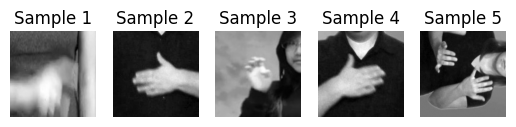

In [ ]:
def grayscale_and_visualize(normalized_folder, grayscale_folder):
    # Create a new folder for grayscale images if it doesn't exist
    if not os.path.exists(grayscale_folder):
        os.makedirs(grayscale_folder)

    # Process each class folder in the normalized folder
    for class_folder in os.listdir(normalized_folder):
        input_class_path = os.path.join(normalized_folder, class_folder)

        # Skip if it's not a directory (to handle any non-directory files)
        if not os.path.isdir(input_class_path):
            continue

        # Create the corresponding class folder in the grayscale folder
        grayscale_class_path = os.path.join(grayscale_folder, class_folder)
        if not os.path.exists(grayscale_class_path):
            os.makedirs(grayscale_class_path)

        # Process each image in the class folder
        for frame_file in os.listdir(input_class_path):
            frame_path = os.path.join(input_class_path, frame_file)
            frame = cv2.imread(frame_path)  # Read the image

            # Convert the frame to grayscale (from BGR to grayscale)
            grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Save the grayscale frame to the output folder
            output_frame_path = os.path.join(grayscale_class_path, frame_file)
            cv2.imwrite(output_frame_path, grayscale_frame)

    print(f"Grayscale conversion complete! Grayscale images saved in: {grayscale_folder}")

def count_grayscale_frames_per_class(folder_path):
    # Count the number of frames in each class folder
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        frame_counts[class_folder] = len(os.listdir(class_path))  # Count files in each class folder
    return frame_counts

def visualize_grayscale_images(grayscale_folder, num_images=5):
    # Collect all grayscale image paths
    all_images = []
    for class_folder in os.listdir(grayscale_folder):
        class_path = os.path.join(grayscale_folder, class_folder)
        all_images += glob.glob(f"{class_path}/*.jpg")

    # Randomly pick and display 5 images from the entire folder
    sampled_images = random.sample(all_images, min(num_images, len(all_images)))
    for i, img_path in enumerate(sampled_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        plt.subplot(1, num_images, i+1)  # Set up the plot
        plt.imshow(img, cmap='gray')  # Show the grayscale image
        plt.axis('off')  # Hide axes
        plt.title(f"Sample {i+1}")  # Title for each image
    plt.show()

# Paths to the input (normalized) and output (grayscale) folders
normalized_folder = "/content/drive/MyDrive/Sign Language Recognition/Normalized_images"
grayscale_folder = "/content/drive/MyDrive/Sign Language Recognition/Greyscale_images"

# Perform grayscale conversion and visualization
grayscale_and_visualize(normalized_folder, grayscale_folder)

# Count the number of grayscale frames per class in the grayscale folder
grayscale_frame_counts = count_grayscale_frames_per_class(grayscale_folder)
print("Frames per class after grayscale conversion:", grayscale_frame_counts)

# Visualize 5 grayscale images (from across all classes)
visualize_grayscale_images(grayscale_folder, num_images=5)

---

### **Canny Edge Detection on Grayscale images**

This script applies Canny edge detection to the images in the grayscale_folder and saves the edge-detected images in the edge_folder

Edge detection complete! Edge-detected images saved in: /content/drive/MyDrive/Sign Language Recognition/Edge_detected
Frames per class after edge detection: {'danger': 480, 'emergency': 418, 'fire': 473, 'help': 466, 'please': 492, 'police': 425, 'stop': 391, 'water': 388}


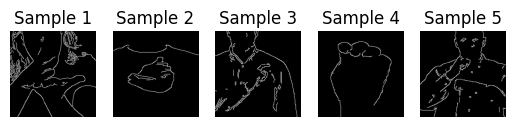

In [ ]:
def edge_detection_and_visualize(grayscale_folder, edge_folder):
    # Create a new folder for edge-detected images if it doesn't exist
    if not os.path.exists(edge_folder):
        os.makedirs(edge_folder)

    # Process each class folder in the grayscale folder
    for class_folder in os.listdir(grayscale_folder):
        input_class_path = os.path.join(grayscale_folder, class_folder)

        # Skip if it's not a directory
        if not os.path.isdir(input_class_path):
            continue

        # Create the corresponding class folder in the edge folder
        edge_class_path = os.path.join(edge_folder, class_folder)
        if not os.path.exists(edge_class_path):
            os.makedirs(edge_class_path)

        # Process each image in the class folder
        for frame_file in os.listdir(input_class_path):
            frame_path = os.path.join(input_class_path, frame_file)
            frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

            # Apply Canny edge detection
            edges = cv2.Canny(frame, 100, 200)

            # Save the edge-detected frame to the output folder
            output_frame_path = os.path.join(edge_class_path, frame_file)
            cv2.imwrite(output_frame_path, edges)

    print(f"Edge detection complete! Edge-detected images saved in: {edge_folder}")

def count_edge_frames_per_class(folder_path):
    # Count the number of edge-detected frames in each class folder
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        frame_counts[class_folder] = len(os.listdir(class_path))  # Count files in each class folder
    return frame_counts

def visualize_edge_images(edge_folder, num_images=5):
    # Collect all edge-detected image paths
    all_images = []
    for class_folder in os.listdir(edge_folder):
        class_path = os.path.join(edge_folder, class_folder)
        all_images += glob.glob(f"{class_path}/*.jpg")

    # Randomly pick and display 5 images from the entire folder
    sampled_images = random.sample(all_images, min(num_images, len(all_images)))
    for i, img_path in enumerate(sampled_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
        plt.subplot(1, num_images, i+1)  # Set up the plot
        plt.imshow(img, cmap='gray')  # Show the edge-detected image
        plt.axis('off')  # Hide axes
        plt.title(f"Sample {i+1}")  # Title for each image
    plt.show()

# Paths to the input (grayscale) and output (edge-detected) folders
grayscale_folder = "/content/drive/MyDrive/Sign Language Recognition/Greyscale_images"
edge_folder = "/content/drive/MyDrive/Sign Language Recognition/Edge_detected"

# Perform edge detection and visualization
edge_detection_and_visualize(grayscale_folder, edge_folder)

# Count the number of edge-detected frames per class in the edge-detected folder
edge_frame_counts = count_edge_frames_per_class(edge_folder)
print("Frames per class after edge detection:", edge_frame_counts)

# Visualize 5 edge-detected images (from across all classes)
visualize_edge_images(edge_folder, num_images=5)

---

### **Performing Balanced Augmentation**

This script performs balanced data augmentation to ensure each class in the dataset has a specific number of images (500 in this case). It uses rotation, translation, flipping, and brightness adjustments to generate augmented images. It counts and displays the final number of images per class after the augmentation process is complete.

In [ ]:
import shutil
from imgaug import augmenters as iaa

def count_frames_per_class(folder_path):
    """
    Counts the number of frames in each class folder.
    """
    frame_counts = {}
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):  # Check if it's a directory (i.e., class folder)
            frame_counts[class_folder] = len(os.listdir(class_path))  # Count the number of images in the class
    return frame_counts

def augment_images_balanced(input_folder, output_folder, target_count):
    """
    Perform balanced augmentation to ensure each class has a target number of images.
    Existing images are also included in the output.
    """
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Define augmentation pipeline using imgaug
    seq = iaa.Sequential([
        iaa.Affine(rotate=(-20, 20)),   # Random rotation between -20 and +20 degrees
        iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}),  # Random translation along x and y axis
        iaa.Flipud(0.5),               # Vertical flip with 50% probability
        iaa.Fliplr(0.5),               # Horizontal flip with 50% probability
        iaa.Multiply((0.8, 1.2)),      # Random brightness adjustment between 80% and 120%
    ])

    # Process each class folder in the input folder
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)
        output_class_path = os.path.join(output_folder, class_folder)

        # Create class folder in the output folder if it doesn't exist
        if not os.path.exists(output_class_path):
            os.makedirs(output_class_path)

        # Copy existing images to the output folder
        for image_file in os.listdir(class_path):
            src_path = os.path.join(class_path, image_file)
            dst_path = os.path.join(output_class_path, image_file)
            shutil.copy(src_path, dst_path)

        # Count current number of images in the class
        current_count = len(os.listdir(class_path))

        # Skip classes that already meet or exceed the target count
        if current_count >= target_count:
            print(f"Class '{class_folder}' already has {current_count} images, skipping augmentation.")
            continue

        # Calculate how many augmentations are needed
        augment_needed = target_count - current_count
        print(f"Class '{class_folder}': Augmenting {augment_needed} images to reach {target_count}.")

        # Collect all available images in the class
        images = [os.path.join(class_path, img) for img in os.listdir(class_path)]

        while augment_needed > 0:
            # Randomly select an image for augmentation
            image_path = random.choice(images)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                continue

            # Generate augmented image
            augmented_image = seq(image=image)

            # Save augmented image with a unique name
            output_file = f"{os.path.splitext(os.path.basename(image_path))[0]}_aug_{random.randint(1000, 9999)}.jpg"
            output_path = os.path.join(output_class_path, output_file)
            cv2.imwrite(output_path, augmented_image)

            augment_needed -= 1

    print("Balanced data augmentation complete!")

# Paths
input_folder = "/content/drive/MyDrive/Sign Language Recognition/Edge_detected"
output_folder = "/content/drive/MyDrive/Sign Language Recognition/Augmented"
target_count = 500  # Target number of images per class

# Perform balanced augmentation
augment_images_balanced(input_folder, output_folder, target_count)

# Count frames after balanced augmentation
balanced_frame_counts = count_frames_per_class(output_folder)
print("Frames per class after balanced augmentation:", balanced_frame_counts)

Class 'danger': Augmenting 20 images to reach 500.
Class 'emergency': Augmenting 82 images to reach 500.
Class 'fire': Augmenting 27 images to reach 500.
Class 'help': Augmenting 34 images to reach 500.
Class 'please': Augmenting 8 images to reach 500.
Class 'police': Augmenting 75 images to reach 500.
Class 'stop': Augmenting 109 images to reach 500.
Class 'water': Augmenting 112 images to reach 500.
Balanced data augmentation complete!
Frames per class after balanced augmentation: {'danger': 500, 'emergency': 500, 'fire': 500, 'help': 500, 'please': 500, 'police': 500, 'stop': 500, 'water': 500}


---

# PART: 2 - Model Training

## **Structuring the Dataset (Train, Validation, Test Split)**

Splitting the Dataset into Train (80%), Validation (10%), and Test (10%) sets.

In [ ]:
import os
import shutil
import random

def split_dataset(input_folder, output_folder, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """
    Splits the dataset into train, validation, and test sets.
    """
    # Ensure output directories exist
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(output_folder, split)
        if not os.path.exists(split_path):
            os.makedirs(split_path)

    # Process each class
    for class_folder in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_folder)

        if not os.path.isdir(class_path):
            continue

        # Create subfolders for train, val, test
        for split in ['train', 'val', 'test']:
            os.makedirs(os.path.join(output_folder, split, class_folder), exist_ok=True)

        # Get all image files
        images = os.listdir(class_path)
        random.shuffle(images)  # Shuffle before splitting

        # Compute split sizes
        train_split = int(len(images) * train_ratio)
        val_split = int(len(images) * val_ratio)

        # Assign images to each split
        train_images = images[:train_split]
        val_images = images[train_split:train_split + val_split]
        test_images = images[train_split + val_split:]

        # Move images to respective folders
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(output_folder, 'train', class_folder, image))
        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(output_folder, 'val', class_folder, image))
        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(output_folder, 'test', class_folder, image))

    print("Dataset split complete!")

# Paths
input_folder = "/content/drive/MyDrive/Sign Language Recognition/Augmented"  # Folder containing 500 images per class
output_folder = "/content/drive/MyDrive/Sign Language Recognition/dataset_splits"  # Destination folder for split datasets

# Perform dataset split
split_dataset(input_folder, output_folder)


Dataset split complete!


---

## **Label Encoding**
Creating a dictionary to map class names to numeric labels.

In [ ]:
import json

# Define class labels
class_labels = {
    'danger': 0,
    'emergency': 1,
    'fire': 2,
    'help': 3,
    'please': 4,
    'police': 5,
    'stop': 6,
    'water': 7
}

# Save to JSON for later use
with open("class_labels.json", "w") as f:
    json.dump(class_labels, f)

print("Class labels saved:", class_labels)


Class labels saved: {'danger': 0, 'emergency': 1, 'fire': 2, 'help': 3, 'please': 4, 'police': 5, 'stop': 6, 'water': 7}


---

## **Loading the Dataset for Training**
Using PyTorch for loading the dataset.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Updated transform to convert grayscale to 3-channel
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1-channel grayscale to 3-channel RGB
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize for 3 channels
])

# Load datasets
train_dataset = datasets.ImageFolder('/content/drive/MyDrive/Sign Language Recognition/dataset_splits/train', transform=transform)
val_dataset = datasets.ImageFolder('/content/drive/MyDrive/Sign Language Recognition/dataset_splits/val', transform=transform)
test_dataset = datasets.ImageFolder('/content/drive/MyDrive/Sign Language Recognition/dataset_splits/test', transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Data Loaders Ready!")


Data Loaders Ready!


---

## **Building a Model Using Transfer Learning (MobileNetV2)**

For sign language recognition, MobileNetV2 is a great choice because:

- It’s lightweight and optimized for mobile/real-time applications.
- It has proven performance on image classification tasks.
- Transfer learning can improve accuracy with small datasets.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision.models import mobilenet_v2

# Load pre-trained MobileNetV2
model = mobilenet_v2(pretrained=True)

# Modify the last layer for 8 classes
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, 8)  # 8 output classes

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model Ready!")


Model Ready!


---

## **Training the Model**

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    """
    Train the model with the given dataset.
    """
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Track loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")

    print("Training Complete!")

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10)


Epoch [1/10], Loss: 0.9500, Accuracy: 68.09%
Epoch [2/10], Loss: 0.5340, Accuracy: 80.91%
Epoch [3/10], Loss: 0.4704, Accuracy: 83.78%
Epoch [4/10], Loss: 0.3690, Accuracy: 86.66%
Epoch [5/10], Loss: 0.3069, Accuracy: 89.12%
Epoch [6/10], Loss: 0.3174, Accuracy: 88.56%
Epoch [7/10], Loss: 0.2705, Accuracy: 90.69%
Epoch [8/10], Loss: 0.2321, Accuracy: 91.97%
Epoch [9/10], Loss: 0.2041, Accuracy: 92.84%
Epoch [10/10], Loss: 0.2263, Accuracy: 92.47%
Training Complete!


---

## **Evaluating the Model on Test Data**

In [ ]:
def evaluate_model(model, test_loader):
    """
    Evaluate the model on the test dataset.
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_acc = 100 * correct / total
    print(f"Test Accuracy: {test_acc:.2f}%")

# Evaluate the trained model
evaluate_model(model, test_loader)


Test Accuracy: 85.00%


---

## **Saving the Model**

In [ ]:
torch.save(model.state_dict(), "sign_language_model.pth")
print("Model Saved!")


Model Saved!


---